## Import necessary packages

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import hypertools as hyp
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')

## Load in csv file

In [73]:
data = pd.read_csv('GSS 4.csv')
data.set_index('Unnamed: 0', inplace=True)

In [74]:
data.head()

,birth_year,region,health,general_happy,past_week_happy,see_friends,see_relatives,income,work_hours,job_satisfaction,weekend_internet,weekday_internet,use_twitter,internet_per_week
Unnamed: 0,,,,,,,,,,,,,,
0,1969.0,New england,Good,Pretty happy,NaN,Sev times a year,Almost daily,$170000 or over,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
1,1955.0,New england,NaN,Pretty happy,NaN,Sev times a year,Sev times a year,$50000 to 59999,NaN,Very satisfied,NaN,NaN,No,NaN
2,1944.0,New england,Good,Very happy,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,1973.0,New england,Good,Pretty happy,NaN,Sev times a week,Sev times a week,$10000 to 12499,NaN,Very satisfied,NaN,NaN,NaN,NaN
4,1961.0,New england,Excellent,Very happy,Most of the time,NaN,NaN,$1 000 to 2 999,NaN,Mod. satisfied,1.0,1.0,No,7.0


## Is happiness data clustered?

### General happiness

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


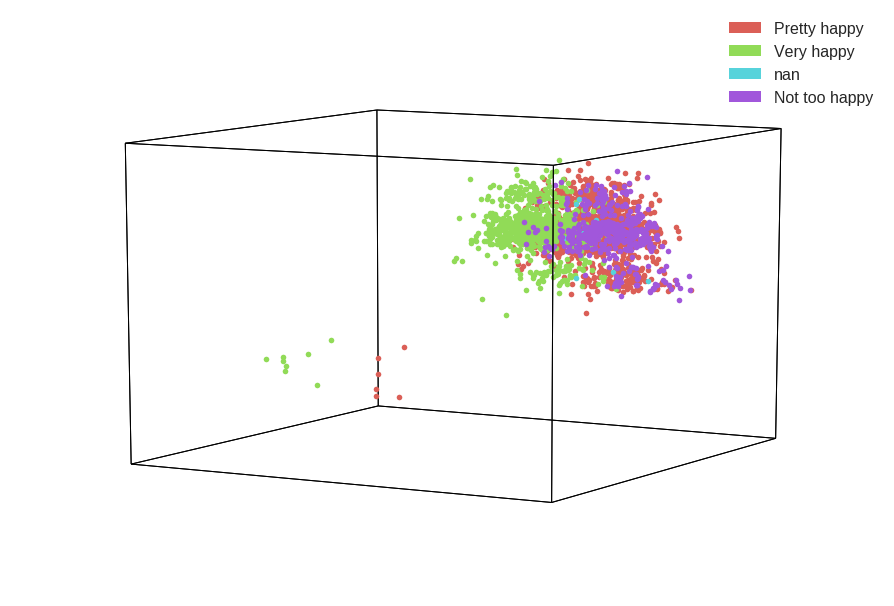

(<matplotlib.figure.Figure at 0x7fed36d34a58>,
 [array([[  1.96900000e+03,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  1.95500000e+03,              nan,              nan, ...,
            1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [  1.94400000e+03,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         ..., 
         [  1.94400000e+03,              nan,   0.00000000e+00, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])],
 None)

In [75]:
hyp.plot(data, '.', group = data['general_happy'], legend = data['general_happy'].unique())

### Happy in past week

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/opt/conda/lib/python3.6/site-packages/hypertools/_externals/ppca.py:85: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


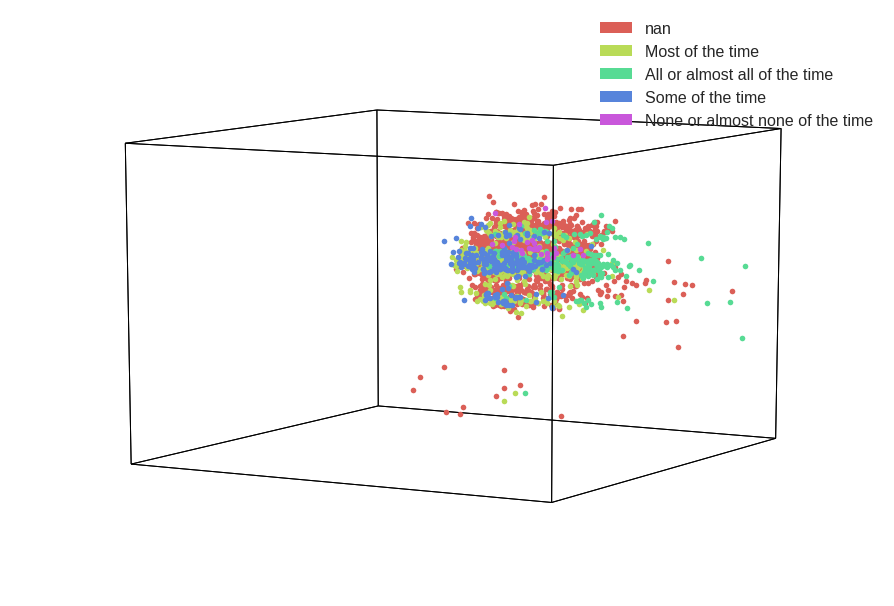

(<matplotlib.figure.Figure at 0x7fed2d0e6470>,
 [array([[  1.96900000e+03,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  1.95500000e+03,              nan,              nan, ...,
            1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [  1.94400000e+03,              nan,              nan, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         ..., 
         [  1.94400000e+03,              nan,   0.00000000e+00, ...,
            0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [             nan,              nan,              nan, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])],
 None)

In [76]:
hyp.plot(data, '.', group = data['past_week_happy'], legend = data['past_week_happy'].unique())

## How does happiness in the past week relate to general happiness?

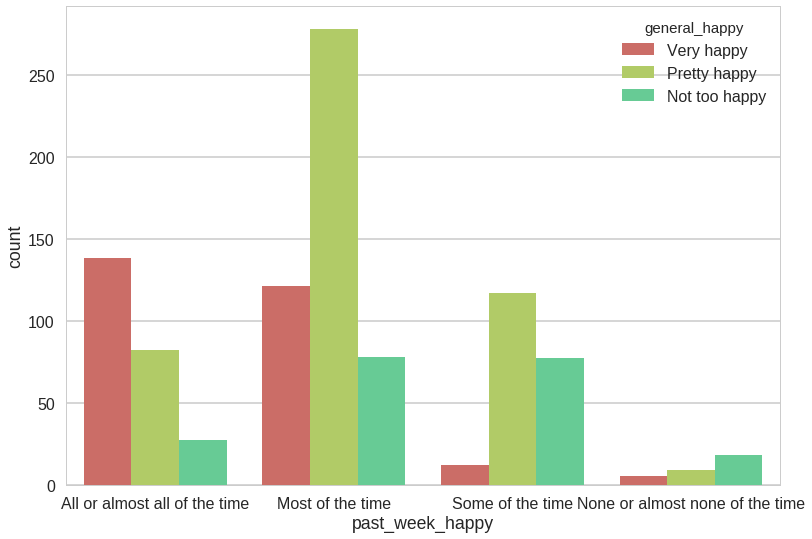

In [77]:
sns.countplot('past_week_happy', hue = 'general_happy', data = data, order = ['All or almost all of the time', 'Most of the time', 'Some of the time', 'None or almost none of the time'], hue_order = ['Very happy', 'Pretty happy', 'Not too happy'])

Amount of happiness in the past week seems to be a good indicator of general happiness level.

## What does work look like for different levels of happiness?

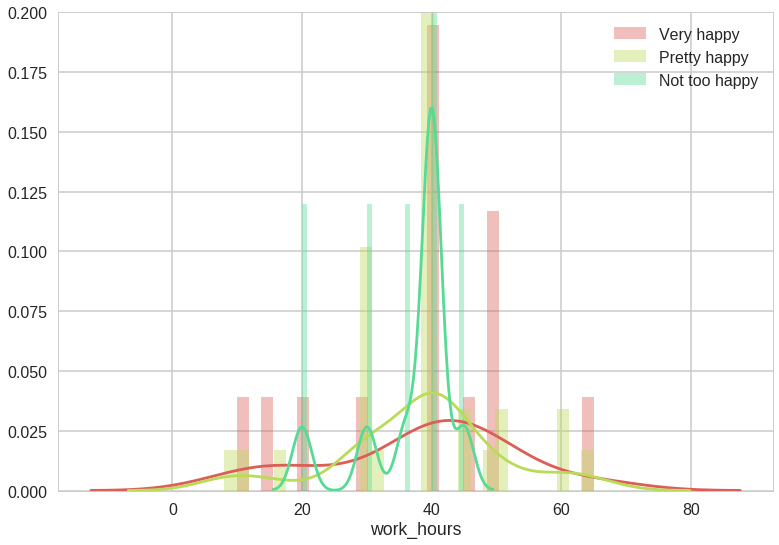

In [80]:
#plot distribution of work hours for each general happiness level
for p in ['Very happy', 'Pretty happy', 'Not too happy']:
    
    sns.distplot(data[data['general_happy']==p]['work_hours'].dropna(), bins = 30, label = p)
    
sns.plt.ylim(0,0.2)
sns.plt.legend()

All happiness levels have the most people working at 40 hrs/wk. People who are very happy are skewed towards working more hours than people who are pretty happy. People who are not too happy spike at 20, 30, and 40 hrs/wk, and drop off after that.

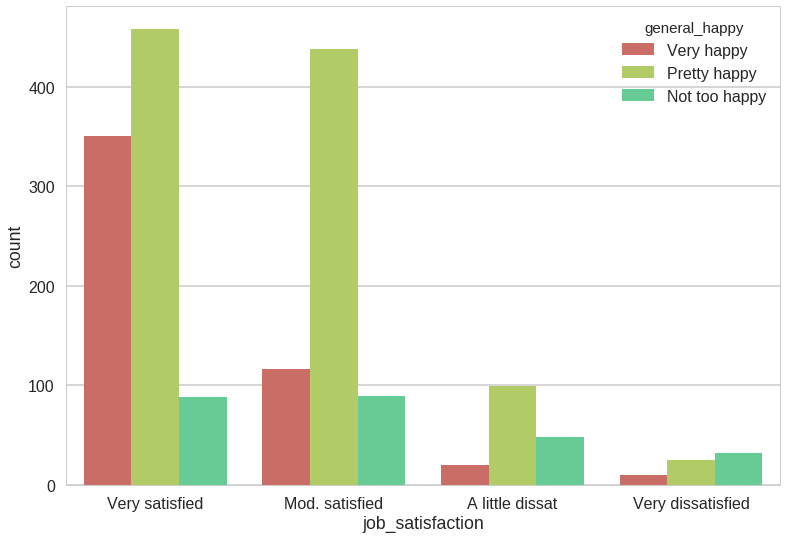

In [82]:
sns.countplot('job_satisfaction', hue = 'general_happy', data = data, order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied'], hue_order = ['Very happy', 'Pretty happy', 'Not too happy'])

Most people seem to be either very or moderately satisfied with their job. Of those people, the majority say they are pretty happy.

### Does age relate to work habits?

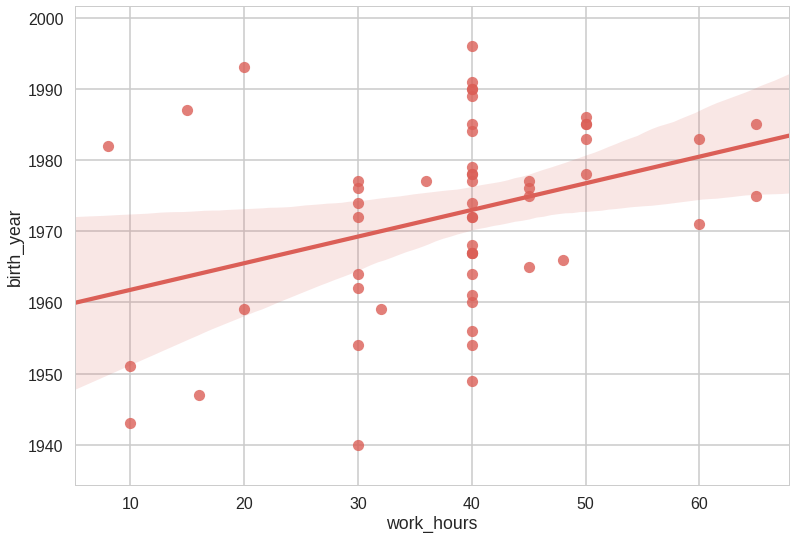

In [86]:
#plot work hours vs. age
sns.regplot(x = 'work_hours', y = 'birth_year', data = data)

People who are younger work more hours.